<a href="https://colab.research.google.com/github/Sudo343/CNN-practice/blob/main/Fruit_Classififcation_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruit Classification Using CNN 2,3 and 4 Layers

In [ ]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [ ]:
#Reading The Traning Data Using CV2 Library
train_images = []       
train_labels = []
shape = (100,100) 
train_path = '/content/drive/MyDrive/AML Datasets/Fruits_Dataset/Train'

for filename in os.listdir('/content/drive/MyDrive/AML Datasets/Fruits_Dataset/Train'):
        img = cv2.imread(os.path.join(train_path,filename))
        
        train_labels.append(filename.split('_')[0])
        
        img = cv2.resize(img,shape)
        train_images.append(img)

train_labels = pd.get_dummies(train_labels).values

train_images = np.array(train_images)

#x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [ ]:
#Reading The Testing Data Using CV2 Library
test_images = []
test_labels = []
test_path = '/content/drive/MyDrive/AML Datasets/Fruits_Dataset/Test'

for filename in os.listdir('/content/drive/MyDrive/AML Datasets/Fruits_Dataset/Test'):
        img = cv2.imread(os.path.join(test_path,filename))
        
        test_labels.append(filename.split('_')[0])
        
        img = cv2.resize(img,shape)
        
        test_images.append(img)

test_labels = pd.get_dummies(test_labels).values
        
test_images = np.array(test_images)

[1 0 0 0 0]


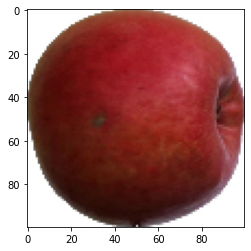

[0 1 0 0 0]


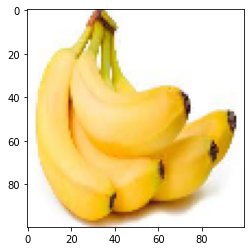

In [ ]:
#Priting The Images
import matplotlib.pyplot as plt
print(train_labels[0])
plt.imshow(cv2.cvtColor(train_images[0], cv2.COLOR_BGR2RGB))
plt.show()
print(train_labels[5])
plt.imshow(cv2.cvtColor(train_images[5], cv2.COLOR_BGR2RGB))

In [ ]:
#Two Convolution Layer
classifier_1 = Sequential()

In [ ]:
classifier_1.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100,100,3]))
classifier_1.add(MaxPool2D(pool_size=(2,2), strides=2))
classifier_1.add(MaxPool2D(pool_size=(2,2), strides=2))
classifier_1.add(Dropout(0.2))

In [ ]:
classifier_1.add(Flatten())
classifier_1.add(Dense(256, activation='relu'))
classifier_1.add(Dense(128, activation='relu'))
classifier_1.add(Dense(5, activation='softmax'))

In [ ]:
epochs = 50

classifier_1.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["acc"],
)

classifier_1.fit(train_images,train_labels, epochs=epochs, validation_data=(test_images,test_labels))


Epoch 1/50
1/1 [==============================] - 1s 889ms/step - loss: 178.2135 - acc: 0.2000 - val_loss: 413.2006 - val_acc: 0.4000
Epoch 2/50
1/1 [==============================] - 0s 183ms/step - loss: 466.1128 - acc: 0.3500 - val_loss: 697.6276 - val_acc: 0.4000
Epoch 3/50
1/1 [==============================] - 0s 185ms/step - loss: 742.1064 - acc: 0.4000 - val_loss: 648.0236 - val_acc: 0.4000
Epoch 4/50
1/1 [==============================] - 0s 177ms/step - loss: 660.8848 - acc: 0.3500 - val_loss: 388.7240 - val_acc: 0.4000
Epoch 5/50
1/1 [==============================] - 0s 177ms/step - loss: 378.1620 - acc: 0.4000 - val_loss: 327.5292 - val_acc: 0.4000
Epoch 6/50
1/1 [==============================] - 0s 179ms/step - loss: 360.9863 - acc: 0.2000 - val_loss: 280.1401 - val_acc: 0.2000
Epoch 7/50
1/1 [==============================] - 0s 178ms/step - loss: 351.7701 - acc: 0.2000 - val_loss: 94.4964 - val_acc: 0.8000
Epoch 8/50
1/1 [==============================] - 0s 218ms/step

In [ ]:
evaluate = classifier_1.evaluate(test_images,test_labels)
print(evaluate)

1/1 [==============================] - 0s 39ms/step - loss: 0.1759 - acc: 1.0000
[0.17590653896331787, 1.0]


In [ ]:
classifier_1.predict(test_images)

array([[0.4651338 , 0.03197231, 0.02149351, 0.46122703, 0.02017326],
       [0.00246184, 0.00834173, 0.9701306 , 0.01295204, 0.00611376],
       [0.00248368, 0.97128356, 0.00571225, 0.01474526, 0.00577532],
       [0.00158732, 0.00867137, 0.00431583, 0.00515442, 0.9802711 ],
       [0.00603535, 0.01220916, 0.0083274 , 0.9658807 , 0.00754743]],
      dtype=float32)

In [ ]:
#Plot Confusion Matrix
y_pred=np.argmax(classifier_1.predict(test_images), axis=0)
y_true= np.argmax(test_labels, axis=0)
print('y_pred :\n ',y_pred)
print('y_true :\n', y_true)
res = tf.math.confusion_matrix(y_pred, y_true)
print(res)

y_pred :
  [0 2 1 4 3]
y_true :
 [0 2 1 4 3]
tf.Tensor(
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]], shape=(5, 5), dtype=int32)


In [ ]:
classifier_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 flatten (Flatten)           (None, 16928)             0

In [ ]:
#Three Convolution Layer
classifier_2 = Sequential()

In [ ]:
classifier_2.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100,100,3]))
classifier_2.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100,100,3]))
classifier_2.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100,100,3]))
classifier_2.add(MaxPool2D(pool_size=(2,2), strides=2))

In [ ]:
classifier_2.add(Dropout(0.2))
classifier_2.add(Flatten())
classifier_2.add(Dense(256, activation='relu'))
classifier_2.add(Dense(256, activation='relu'))
classifier_2.add(Dense(5, activation='softmax'))

In [ ]:
classifier_2.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["acc"],
)

classifier_2.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images,test_labels))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 15.6125 - acc: 0.1500 - val_loss: 888.8986 - val_acc: 0.2000
Epoch 2/50
1/1 [==============================] - 1s 983ms/step - loss: 941.5418 - acc: 0.2000 - val_loss: 462.8429 - val_acc: 0.2000
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 462.2350 - acc: 0.2000 - val_loss: 294.1273 - val_acc: 0.2000
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 312.3775 - acc: 0.2000 - val_loss: 200.4127 - val_acc: 0.2000
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 209.7993 - acc: 0.2000 - val_loss: 96.6135 - val_acc: 0.4000
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 102.2039 - acc: 0.4000 - val_loss: 49.6375 - val_acc: 0.4000
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 43.1747 - acc: 0.5000 - val_loss: 53.7901 - val_acc: 0.2000
Epoch 8/50
1/1 [==============================] - 2s 2s/step - loss: 46.2810 - acc: 0

In [ ]:
evaluate = classifier_2.evaluate(test_images,test_labels)
print(evaluate)

1/1 [==============================] - 0s 86ms/step - loss: 19.8809 - acc: 0.8000
[19.880861282348633, 0.800000011920929]


In [ ]:
classifier_2.predict(test_images)

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.2541308e-09,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [8.8716717e-16, 5.4878873e-01, 1.7933799e-21, 4.5121124e-01,
        1.0788661e-16],
       [2.0127727e-36, 3.9130448e-36, 0.0000000e+00, 8.6987320e-23,
        1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [ ]:
#Plot Confusion Matrix
y_pred=np.argmax(classifier_2.predict(test_images), axis=0)
y_true= np.argmax(test_labels, axis=0)
print('y_pred :\n ',y_pred)
print('y_true :\n', y_true)
res = tf.math.confusion_matrix(y_pred, y_true)
print(res)

y_pred :
  [0 2 2 1 3]
y_true :
 [0 2 1 4 3]
tf.Tensor(
[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)


In [ ]:
classifier_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 47, 47, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 70688)             0         
                                                      

In [ ]:
#Four Convolution Layers
classifier_3 = Sequential()

In [ ]:
classifier_3.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100,100,3]))
classifier_3.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100,100,3]))
classifier_3.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100,100,3]))
classifier_3.add(MaxPool2D(pool_size=(2,2), strides=2))
classifier_3.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[49,49,3]))
classifier_3.add(MaxPool2D(pool_size=(2,2), strides=2))

In [ ]:
classifier_3.add(Dropout(0.2))
classifier_3.add(Flatten())
classifier_3.add(Dense(256, activation='relu'))
classifier_3.add(Dense(256, activation='relu'))
classifier_3.add(Dense(5, activation='softmax'))

In [ ]:
classifier_3.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["acc"],
)

classifier_3.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images,test_labels))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 46.3104 - acc: 0.3000 - val_loss: 157.3549 - val_acc: 0.2000
Epoch 2/50
1/1 [==============================] - 1s 894ms/step - loss: 169.9648 - acc: 0.2000 - val_loss: 165.0174 - val_acc: 0.2000
Epoch 3/50
1/1 [==============================] - 1s 879ms/step - loss: 179.9602 - acc: 0.2000 - val_loss: 39.2305 - val_acc: 0.4000
Epoch 4/50
1/1 [==============================] - 1s 883ms/step - loss: 41.5991 - acc: 0.3500 - val_loss: 17.8415 - val_acc: 0.2000
Epoch 5/50
1/1 [==============================] - 1s 951ms/step - loss: 16.5736 - acc: 0.2500 - val_loss: 13.2227 - val_acc: 0.2000
Epoch 6/50
1/1 [==============================] - 1s 897ms/step - loss: 14.1829 - acc: 0.2000 - val_loss: 13.2668 - val_acc: 0.4000
Epoch 7/50
1/1 [==============================] - 1s 886ms/step - loss: 14.0761 - acc: 0.2000 - val_loss: 19.9182 - val_acc: 0.4000
Epoch 8/50
1/1 [==============================] - 1s 881ms/step - loss: 20.

In [ ]:
evaluate3 = classifier_3.evaluate(test_images,test_labels)
print(evaluate3)

1/1 [==============================] - 0s 67ms/step - loss: 0.2525 - acc: 0.8000
[0.2525132894515991, 0.800000011920929]


In [ ]:
classifier_3.predict(test_images)

array([[1.0000000e+00, 5.2240265e-12, 3.8327102e-12, 2.5473414e-09,
        2.1426159e-08],
       [2.8756574e-07, 7.1679121e-01, 2.8305823e-01, 1.4776192e-04,
        2.5471336e-06],
       [1.6826736e-10, 9.9977058e-01, 2.2602378e-04, 3.4173415e-06,
        2.6463312e-08],
       [1.3869754e-08, 6.2761792e-06, 1.2719395e-05, 3.8405376e-10,
        9.9998105e-01],
       [1.5528535e-04, 4.3259020e-06, 5.1128911e-05, 9.9978477e-01,
        4.5046868e-06]], dtype=float32)

In [ ]:
#Plot Confusion Matrix
y_pred=np.argmax(classifier_3.predict(test_images), axis=0)
y_true= np.argmax(test_labels, axis=0)
print('y_pred :\n ',y_pred)
print('y_true :\n', y_true)
res = tf.math.confusion_matrix(y_pred, y_true)
print(res)

y_pred :
  [0 2 1 4 3]
y_true :
 [0 2 1 4 3]
tf.Tensor(
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]], shape=(5, 5), dtype=int32)


In [ ]:
classifier_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                  